In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from IPython.display import display


In [3]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"


In [4]:
# !wget $data_url
# 

In [5]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# To pass in multiple statements, we need to use | instead of 'or' because this is pandas
# these are the bitwise operators for pandas - | for or, & for and
df_subset = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df_subset_filled = df_subset.fillna(0)

In [9]:
df_full_train, df_test = train_test_split(df_subset_filled, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,134100.0,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,321800.0,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,110400.0,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,168200.0,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,156600.0,<1H OCEAN


In [11]:
y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value


In [12]:
# apply log transform to our y value == median_house_value
# np.log1p(y_value)

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [13]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [14]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN


In [15]:
# Turn into matrices using DictVectorizer
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train.to_dict(orient='records')


In [16]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

In [17]:
feature_names = list(dv.get_feature_names_out())
feature_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [18]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [19]:
from sklearn.tree import DecisionTreeRegressor


In [20]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
from sklearn import tree
from sklearn.tree import export_text

In [22]:
print(export_text(dt, feature_names=feature_names))
# ocean proximity is used for splitting the data

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



[Text(0.5, 0.75, 'x[5] <= 0.5\nsquared_error = 0.322\nsamples = 9411\nvalue = 12.011'),
 Text(0.25, 0.25, 'squared_error = 0.23\nsamples = 3924\nvalue = 11.607'),
 Text(0.75, 0.25, 'squared_error = 0.186\nsamples = 5487\nvalue = 12.301')]

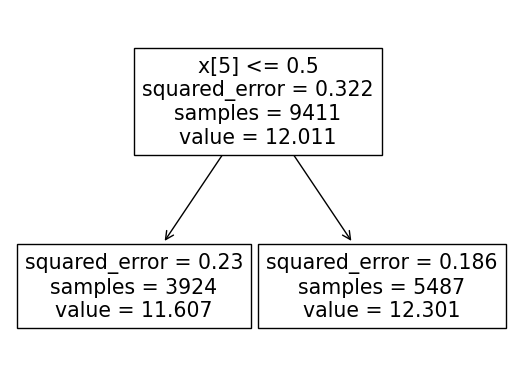

In [23]:
tree.plot_tree(dt)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1)

In [26]:
y_pred = rf.predict(X_val)

In [27]:
# calculate RMSE score
from sklearn.metrics import mean_squared_error


In [28]:
mean_squared_error(y_val, y_pred, squared=False)

0.24518772479229908

In [30]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    scores.append((n,  round(rmse, 3)))
    

In [37]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

plt.show()

ValueError: 2 columns passed, passed data had 3 columns

In [32]:
df_scores

,n_estimators,rmse
0,10,0.245
1,20,0.239
2,30,0.237
3,40,0.235
4,50,0.235
5,60,0.234
6,70,0.234
7,80,0.234
8,90,0.234
9,100,0.234


In [34]:
# scores for max_depth
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        scores.append((d, n, round(rmse, 3)))

In [39]:
df_scores = pd.DataFrame(scores, columns=['max_depth',  'n_estimators', 'rmse'])
df_scores.sort_values(by='rmse').head()


,max_depth,n_estimators,rmse
76,25,170,0.233
75,25,160,0.233
79,25,200,0.234
56,20,170,0.234
55,20,160,0.234


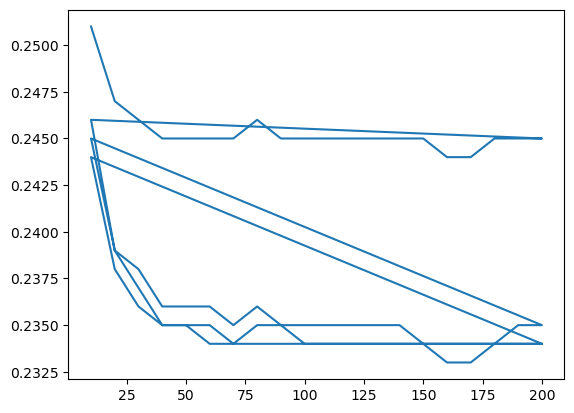

In [38]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))
plt.show()
